In [1]:
from sklearn.datasets import fetch_openml
minst= fetch_openml('mnist_784')

In [2]:
type(minst)
# minst.DESCR
# minst.data

sklearn.utils._bunch.Bunch

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mlt
import numpy as np
import pandas as pd
import openpyxl

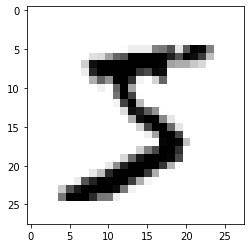

In [4]:
feat, label = minst["data"], minst["target"]
img = np.array(feat.iloc[0])
img = img.reshape(28,28)
plt.imshow(img,interpolation='nearest',cmap=mlt.cm.binary)
#interpolation - algo that should be use when resizing the image
#cmap - which colour map should be used to display image, in binary white colour is nearer to zero and black is closer to 1
plt.show()



xtrain - all training dataset
ytrain - labels for xtrain dataset containing 0 to 9 

ytrain_9 - only true and false values 
           true if label is 9 otherwise false

xtest - all testing dataset
ytest - labels for xtest dataset containing 0 to 9

ytest_9 - only true and false values 
          true if label is 9 otherwise false

In [5]:
# mnist dateset is already shuffled so we only slpit it
xtrain, ytrain, xtest, ytest = minst['data'][:60000],minst['target'][:60000],minst['data'][60000:],minst['target'][60000:]
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [6]:
#binary classifier for 9
ytrain_9 = (ytrain == '9')
ytest_9 = (ytest == '9')

ytrain_9.unique(), ytest_9.unique()

(array([False,  True]), array([False,  True]))

In [7]:
from sklearn.linear_model import SGDClassifier
#SGD uses linear regression, support vector machine etc along with SGD as a optimizer, so we can treat SGDClassifier as lr, svm, etc
sgd = SGDClassifier(random_state=42)#The SGDClassifier relies on randomness during training so to produce same prediction use random_state
sgd.fit(xtrain,ytrain_9)

SGDClassifier(random_state=42)

In [8]:
sgd.predict(xtest)

array([False, False, False, ..., False, False, False])

## Performance Measures 

#### 1. Measuring Accuracy using cross validation
Let’s use the cross_val_score() function to evaluate your SGDClassifier model
using K-fold cross-validation, with three folds. K-fold cross validation means splitting the training set into K-folds (in this case, Six), then making predictions and evaluating them on each fold using a model trained on the
remaining folds

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,xtrain,ytrain_9,cv=6,scoring='accuracy')

array([0.949 , 0.941 , 0.9494, 0.9304, 0.9469, 0.945 ])

#### 2. Confusion Matrix

The general idea is to count the number of times instance of class are classified as class b.

Here we are using cross_val_predict to return the prediction done on training dataset
Why corss_val_predict, it will predict the labels in such a way that the data for prediction is never used while training
That means, if k = 3, then it will split training data into three parts - 1,2,3
It will train model using 2nd, 3rd part and prediction is done on 1st part
Similarly prediction is done on 2nd, 3rd using other twos for trainig
So each time we get fresh prediction (fresh -  meaning that the prediction is made by a model
that never saw the data during training)

In [10]:
from sklearn.model_selection import cross_val_predict

pred = cross_val_predict(sgd, xtrain, ytrain_9, cv=5)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain_9,pred)
#Rows denote actual and columns denoted predicated values
#ideal should diagnoal matrix (which is only diagonal elements are non zero and non-diagonal elements are zero)
#names = row1 - non 5, row2 - 5 , whereas col1 - non 5 and col2 - 5

array([[52300,  1751],
       [ 1532,  4417]], dtype=int64)

In [12]:
confusion_matrix(ytrain_9,ytrain_9)#Ideal confusion matrix

array([[54051,     0],
       [    0,  5949]], dtype=int64)

#### Precision and Recall

Precision = (TP)/(TP +FP)                                                                                                               
Recall/ True positive rate = (TP)/(TP + FN)                                                                                                                             
TP = true positive

In [15]:
from sklearn.metrics import precision_score, recall_score
print("precision_score : ", precision_score(ytrain_9,pred))
print("recall_score : ", recall_score(ytrain_9,pred))
#correct only 71.6% 
#detects 74.2% of 9s

precision_score :  0.7161154345006485
recall_score :  0.7424777273491343
